In [1]:
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout

model = Sequential([
    Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(100,100,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(64, (5,5), activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dropout(0.5),
    Dense(units=128, activation='relu'),
    Dense(units=15, activation='softmax')
])

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 64)         0

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

train_path = 'duomenys/train'
valid_path = 'duomenys/val'
test_path = 'duomenys/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

train_batches = train_datagen.flow_from_directory(
    directory=train_path, 
    target_size=(100,100), 
    batch_size=32
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

validation_batches = test_datagen.flow_from_directory(
        directory=valid_path, 
        target_size=(100,100),  
        batch_size=32
)

test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(
        directory=test_path, target_size=(100,100), batch_size=32)

Found 6152 images belonging to 15 classes.
Found 721 images belonging to 15 classes.
Found 372 images belonging to 15 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

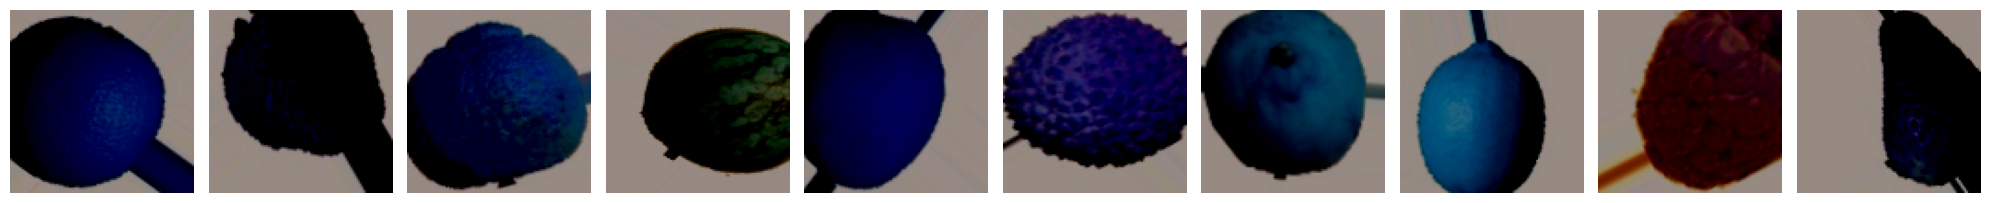

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.

In [4]:
imgs, labels = next(train_batches)

import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(imgs)
print(labels)

In [5]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=['accuracy'])

In [6]:
model.fit(x=train_batches, validation_data=validation_batches, epochs=5, verbose=2)

Epoch 1/5
193/193 - 31s - loss: 1.3743 - accuracy: 0.5393 - val_loss: 0.3490 - val_accuracy: 0.9182 - 31s/epoch - 161ms/step
Epoch 2/5
193/193 - 24s - loss: 0.3993 - accuracy: 0.8644 - val_loss: 0.1078 - val_accuracy: 0.9736 - 24s/epoch - 126ms/step
Epoch 3/5
193/193 - 24s - loss: 0.2165 - accuracy: 0.9314 - val_loss: 0.0566 - val_accuracy: 0.9889 - 24s/epoch - 123ms/step
Epoch 4/5
193/193 - 24s - loss: 0.1453 - accuracy: 0.9486 - val_loss: 0.0286 - val_accuracy: 0.9931 - 24s/epoch - 123ms/step
Epoch 5/5
193/193 - 27s - loss: 0.1009 - accuracy: 0.9672 - val_loss: 0.0279 - val_accuracy: 0.9931 - 27s/epoch - 141ms/step


In [22]:
model.save('modelis/')


INFO:tensorflow:Assets written to: model_lux/assets


INFO:tensorflow:Assets written to: model_lux/assets


In [3]:
from tensorflow import keras
model = keras.models.load_model('modelis/')


In [13]:
train_batches.class_indices

{'Apple': 0,
 'Apricot': 1,
 'Avocado': 2,
 'Banana': 3,
 'Blueberry': 4,
 'Cherry': 5,
 'Grape': 6,
 'Lemon': 7,
 'Lychee': 8,
 'Mandarine': 9,
 'Orange': 10,
 'Pear': 11,
 'Raspberry': 12,
 'Strawberry': 13,
 'Watermelon': 14}

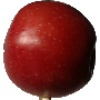

1/1 [==============================] - 0s 19ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


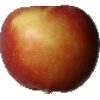

1/1 [==============================] - 0s 18ms/step
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  4.6606546e-19 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[0]


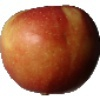

1/1 [==============================] - 0s 17ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


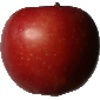

1/1 [==============================] - 0s 18ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


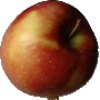

1/1 [==============================] - 0s 22ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


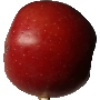

1/1 [==============================] - 0s 20ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


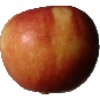

1/1 [==============================] - 0s 20ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


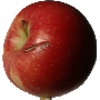

1/1 [==============================] - 0s 18ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


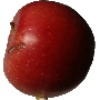

1/1 [==============================] - 0s 17ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


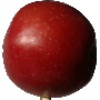

1/1 [==============================] - 0s 18ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


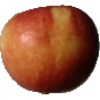

1/1 [==============================] - 0s 17ms/step
[[6.580594e-37 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]
[1]


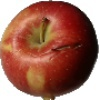

1/1 [==============================] - 0s 17ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


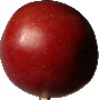

1/1 [==============================] - 0s 22ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


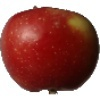

1/1 [==============================] - 0s 20ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


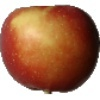

1/1 [==============================] - 0s 20ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


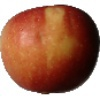

1/1 [==============================] - 0s 19ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


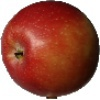

1/1 [==============================] - 0s 20ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


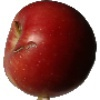

1/1 [==============================] - 0s 19ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


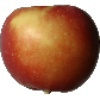

1/1 [==============================] - 0s 18ms/step
[[2.2645019e-10 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[10]


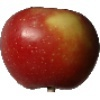

1/1 [==============================] - 0s 17ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


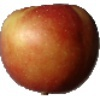

1/1 [==============================] - 0s 18ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


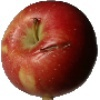

1/1 [==============================] - 0s 20ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


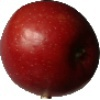

1/1 [==============================] - 0s 20ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


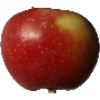

1/1 [==============================] - 0s 21ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


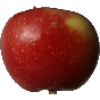

1/1 [==============================] - 0s 18ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


In [11]:
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import tensorflow.keras as keras
import numpy as np
import os

path = "./duomenys/test/apple/"
image_dir = os.listdir(path)
for file in image_dir:
    img = image.load_img(path+file)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    img.show()
    
                   

    prob = model.predict(x)
    print(prob)
    a = np.argmax(prob, axis=1)
    print(a)

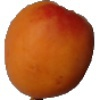

1/1 [==============================] - 0s 20ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


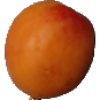

1/1 [==============================] - 0s 19ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


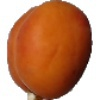

1/1 [==============================] - 0s 20ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


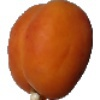

1/1 [==============================] - 0s 25ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


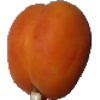

1/1 [==============================] - 0s 19ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


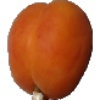

1/1 [==============================] - 0s 17ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


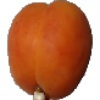

1/1 [==============================] - 0s 17ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


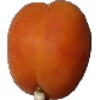

1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


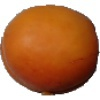

1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


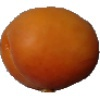

1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


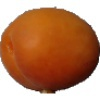

1/1 [==============================] - 0s 19ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


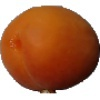

1/1 [==============================] - 0s 19ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


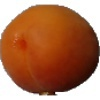

1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


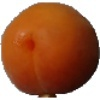

1/1 [==============================] - 0s 17ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


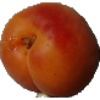

1/1 [==============================] - 0s 17ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


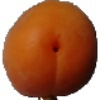

1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


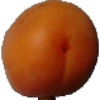

1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


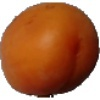

1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


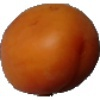

1/1 [==============================] - 0s 20ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


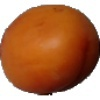

1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


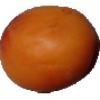

1/1 [==============================] - 0s 17ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


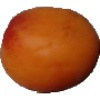

1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


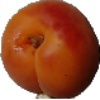

1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


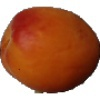

1/1 [==============================] - 0s 19ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


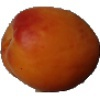

1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1]


In [12]:
path = "./duomenys/test/apricot/"
image_dir = os.listdir(path)
for file in image_dir:
    img = image.load_img(path+file)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    img.show()
    
                   

    prob = model.predict(x)
    print(prob)
    a = np.argmax(prob, axis=1)
    print(a)

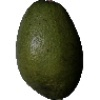

1/1 [==============================] - 0s 19ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2]


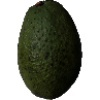

1/1 [==============================] - 0s 18ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2]


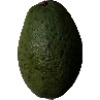

1/1 [==============================] - 0s 19ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2]


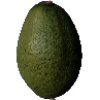

1/1 [==============================] - 0s 18ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2]


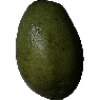

1/1 [==============================] - 0s 24ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2]


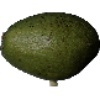

1/1 [==============================] - 0s 21ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2]


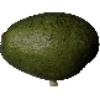

1/1 [==============================] - 0s 17ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2]


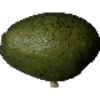

1/1 [==============================] - 0s 19ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2]


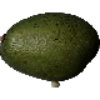

1/1 [==============================] - 0s 18ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2]


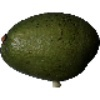

1/1 [==============================] - 0s 19ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2]


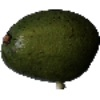

1/1 [==============================] - 0s 17ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2]


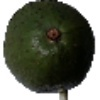

1/1 [==============================] - 0s 20ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2]


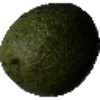

1/1 [==============================] - 0s 19ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2]


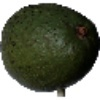

1/1 [==============================] - 0s 19ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2]


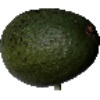

1/1 [==============================] - 0s 17ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2]


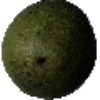

1/1 [==============================] - 0s 18ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2]


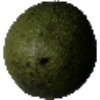

1/1 [==============================] - 0s 18ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2]


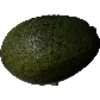

1/1 [==============================] - 0s 19ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2]


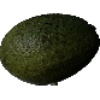

1/1 [==============================] - 0s 20ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2]


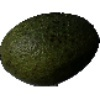

1/1 [==============================] - 0s 20ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2]


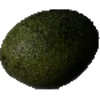

1/1 [==============================] - 0s 21ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2]


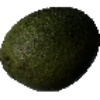

1/1 [==============================] - 0s 19ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2]


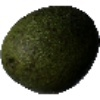

1/1 [==============================] - 0s 19ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2]


In [13]:
path = "./duomenys/test/avocado/"
image_dir = os.listdir(path)
for file in image_dir:
    img = image.load_img(path+file)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    img.show()
    
                   

    prob = model.predict(x)
    print(prob)
    a = np.argmax(prob, axis=1)
    print(a)

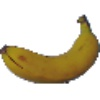

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


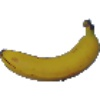

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


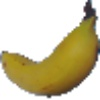

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


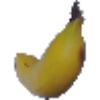

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


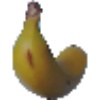

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


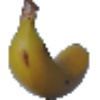

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


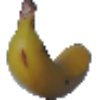

1/1 [==============================] - 0s 21ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


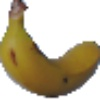

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


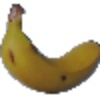

1/1 [==============================] - 0s 20ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


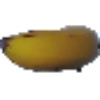

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


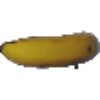

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


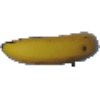

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


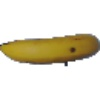

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


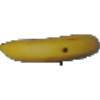

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


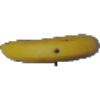

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


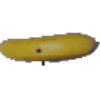

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


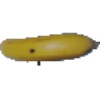

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


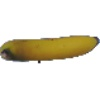

1/1 [==============================] - 0s 20ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


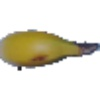

1/1 [==============================] - 0s 20ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


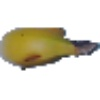

1/1 [==============================] - 0s 21ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


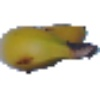

1/1 [==============================] - 0s 21ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


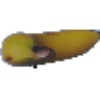

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


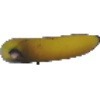

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


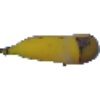

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


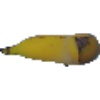

1/1 [==============================] - 0s 21ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3]


In [14]:
path = "./duomenys/test/banana/"
image_dir = os.listdir(path)
for file in image_dir:
    img = image.load_img(path+file)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    img.show()
    
                   

    prob = model.predict(x)
    print(prob)
    a = np.argmax(prob, axis=1)
    print(a)

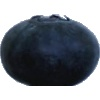

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[4]


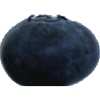

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[4]


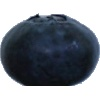

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[4]


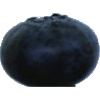

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[4]


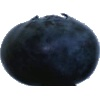

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[4]


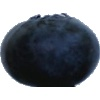

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[4]


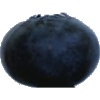

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[4]


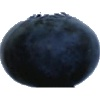

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[4]


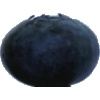

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[4]


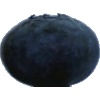

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[4]


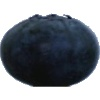

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[4]


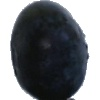

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


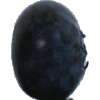

1/1 [==============================] - 0s 17ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.2441622e-33
  1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[5]


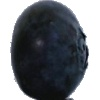

1/1 [==============================] - 0s 18ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  1.3384743e-08 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[4]


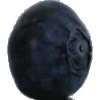

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[4]


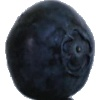

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[4]


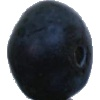

1/1 [==============================] - 0s 18ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  3.9420043e-14 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[4]


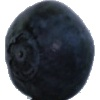

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[4]


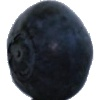

1/1 [==============================] - 0s 20ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[4]


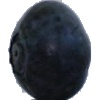

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[4]


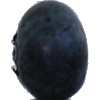

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[4]


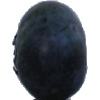

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[4]


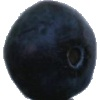

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


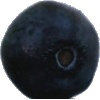

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


In [15]:
path = "./duomenys/test/blueberry/"
image_dir = os.listdir(path)
for file in image_dir:
    img = image.load_img(path+file)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    img.show()
    
                   

    prob = model.predict(x)
    print(prob)
    a = np.argmax(prob, axis=1)
    print(a)

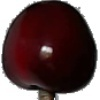

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


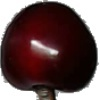

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


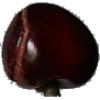

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


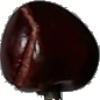

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


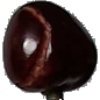

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


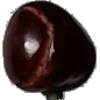

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


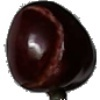

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


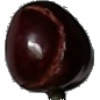

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


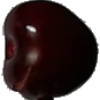

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


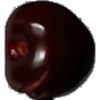

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


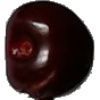

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


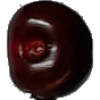

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


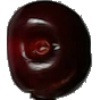

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


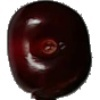

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


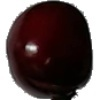

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


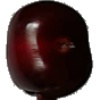

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


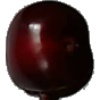

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


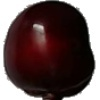

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


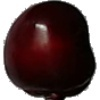

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


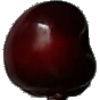

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


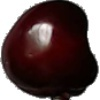

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


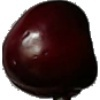

1/1 [==============================] - 0s 20ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


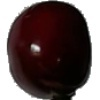

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


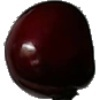

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


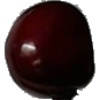

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


In [16]:
path = "./duomenys/test/cherry/"
image_dir = os.listdir(path)
for file in image_dir:
    img = image.load_img(path+file)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    img.show()
    
                   

    prob = model.predict(x)
    print(prob)
    a = np.argmax(prob, axis=1)
    print(a)

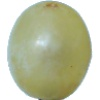

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[6]


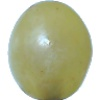

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[6]


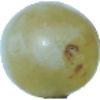

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[6]


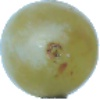

1/1 [==============================] - 0s 17ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 2.4339388e-23 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[11]


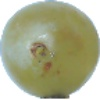

1/1 [==============================] - 0s 18ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.6647869e-07 0.0000000e+00 0.0000000e+00
  0.0000000e+00 9.9999988e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[11]


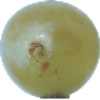

1/1 [==============================] - 0s 18ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.4024996e-09 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[11]


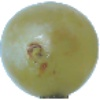

1/1 [==============================] - 0s 17ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0493127e-12 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[11]


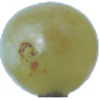

1/1 [==============================] - 0s 19ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 3.6468413e-30 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[7]


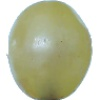

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[6]


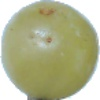

1/1 [==============================] - 0s 18ms/step
[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 1.036426e-22 0.000000e+00 0.000000e+00 0.000000e+00]]
[6]


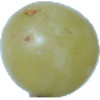

1/1 [==============================] - 0s 18ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.3037846e-13 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[6]


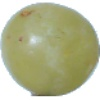

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[6]


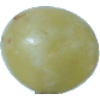

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[6]


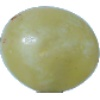

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[6]


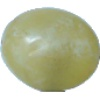

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[6]


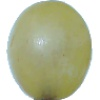

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[6]


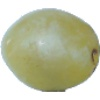

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[6]


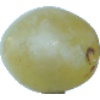

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[6]


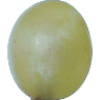

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[6]


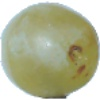

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[6]


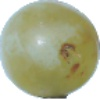

1/1 [==============================] - 0s 19ms/step
[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 2.147885e-24 0.000000e+00 0.000000e+00 0.000000e+00]]
[6]


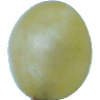

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[6]


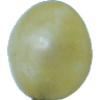

1/1 [==============================] - 0s 22ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[6]


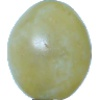

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[6]


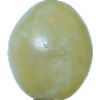

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[6]


In [17]:
path = "./duomenys/test/grape/"
image_dir = os.listdir(path)
for file in image_dir:
    img = image.load_img(path+file)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    img.show()
    
                   

    prob = model.predict(x)
    print(prob)
    a = np.argmax(prob, axis=1)
    print(a)

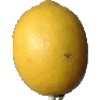

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


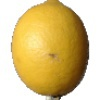

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


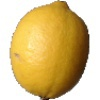

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


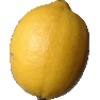

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


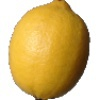

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


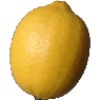

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


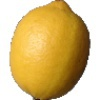

1/1 [==============================] - 0s 20ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


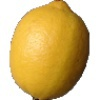

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


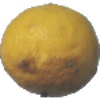

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


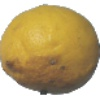

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


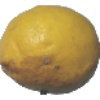

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


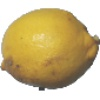

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


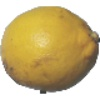

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


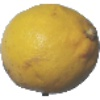

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


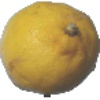

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


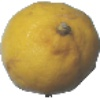

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


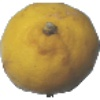

1/1 [==============================] - 0s 21ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


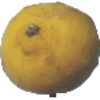

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


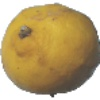

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


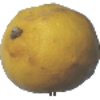

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


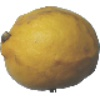

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


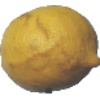

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


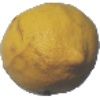

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


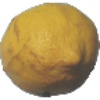

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


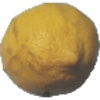

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


In [18]:
path = "./duomenys/test/lemon/"
image_dir = os.listdir(path)
for file in image_dir:
    img = image.load_img(path+file)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    img.show()
    
                   

    prob = model.predict(x)
    print(prob)
    a = np.argmax(prob, axis=1)
    print(a)

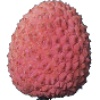

1/1 [==============================] - 0s 20ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


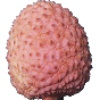

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


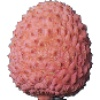

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


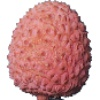

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


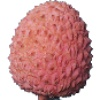

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


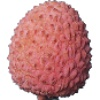

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


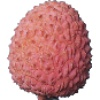

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


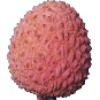

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


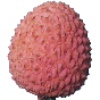

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


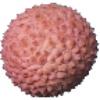

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


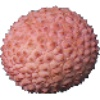

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


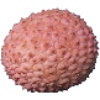

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


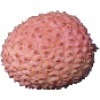

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


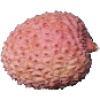

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


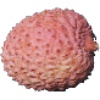

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


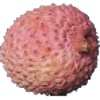

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


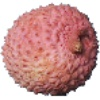

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


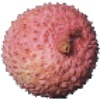

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


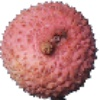

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


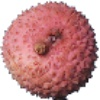

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


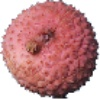

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


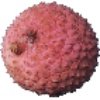

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


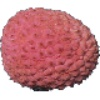

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


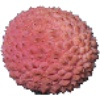

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


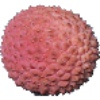

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[8]


In [20]:
path = "./duomenys/test/lychee/"
image_dir = os.listdir(path)
for file in image_dir:
    img = image.load_img(path+file)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    img.show()
    
                   

    prob = model.predict(x)
    print(prob)
    a = np.argmax(prob, axis=1)
    print(a)

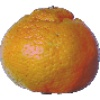

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[9]


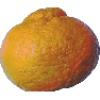

1/1 [==============================] - 0s 17ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  9.9800545e-34 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[9]


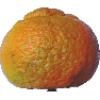

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


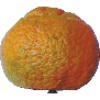

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[9]


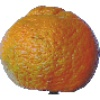

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[9]


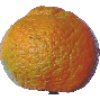

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[9]


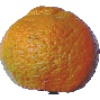

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[9]


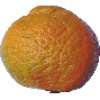

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[9]


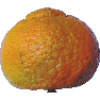

1/1 [==============================] - 0s 16ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  5.1271396e-08 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[9]


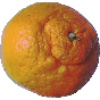

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[9]


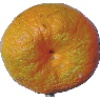

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


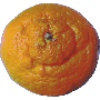

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[9]


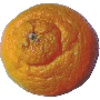

1/1 [==============================] - 0s 17ms/step
[[0.000000e+00 9.350758e-32 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]
[9]


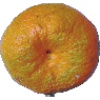

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


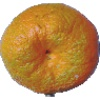

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


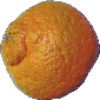

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[9]


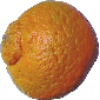

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[9]


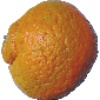

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[9]


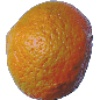

1/1 [==============================] - 0s 19ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.4944929e-07
  9.9999988e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[10]


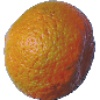

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


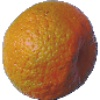

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


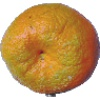

1/1 [==============================] - 0s 17ms/step
[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00
  4.817341e-33 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]
[9]


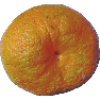

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


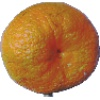

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


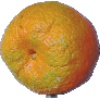

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[9]


In [21]:
path = "./duomenys/test/mandarine/"
image_dir = os.listdir(path)
for file in image_dir:
    img = image.load_img(path+file)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    img.show()
    
                   

    prob = model.predict(x)
    print(prob)
    a = np.argmax(prob, axis=1)
    print(a)

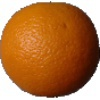

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


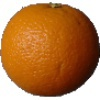

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


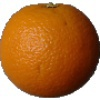

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


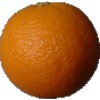

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


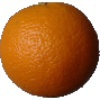

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


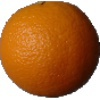

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


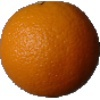

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


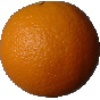

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


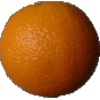

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


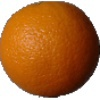

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


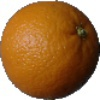

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


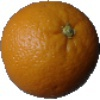

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


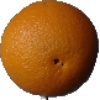

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


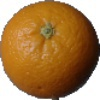

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


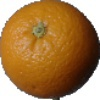

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


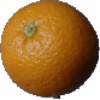

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


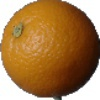

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


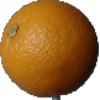

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


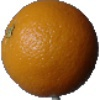

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


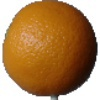

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


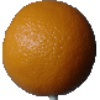

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


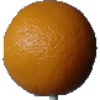

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


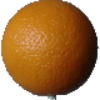

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


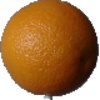

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


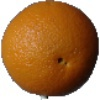

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


In [22]:
path = "./duomenys/test/orange/"
image_dir = os.listdir(path)
for file in image_dir:
    img = image.load_img(path+file)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    img.show()
    
                   

    prob = model.predict(x)
    print(prob)
    a = np.argmax(prob, axis=1)
    print(a)

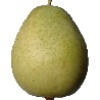

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[11]


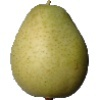

1/1 [==============================] - 0s 19ms/step
[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 8.234811e-10 0.000000e+00 0.000000e+00
  0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]
[11]


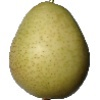

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


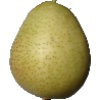

1/1 [==============================] - 0s 20ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


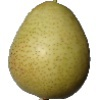

1/1 [==============================] - 0s 21ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


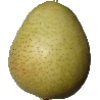

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


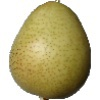

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


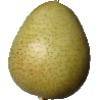

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


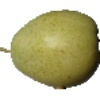

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[11]


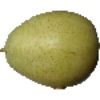

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[11]


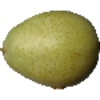

1/1 [==============================] - 0s 24ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[11]


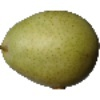

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[11]


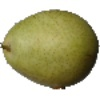

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[11]


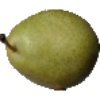

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[11]


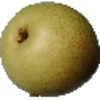

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


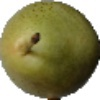

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


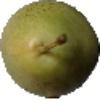

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


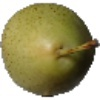

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[11]


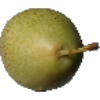

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[11]


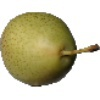

1/1 [==============================] - 0s 24ms/step
[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 7.345271e-30 0.000000e+00 0.000000e+00
  0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]
[11]


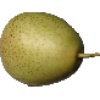

1/1 [==============================] - 0s 20ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.9192774e-19 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[7]


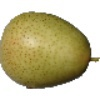

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[7]


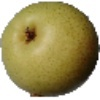

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[10]


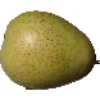

1/1 [==============================] - 0s 18ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 9.9935895e-01 0.0000000e+00 0.0000000e+00
  6.4102130e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[7]


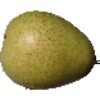

1/1 [==============================] - 0s 19ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 6.5999014e-37 0.0000000e+00 0.0000000e+00
  1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[10]


In [23]:
path = "./duomenys/test/pear/"
image_dir = os.listdir(path)
for file in image_dir:
    img = image.load_img(path+file)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    img.show()
    
                   

    prob = model.predict(x)
    print(prob)
    a = np.argmax(prob, axis=1)
    print(a)

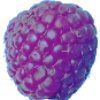

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


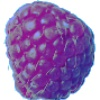

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


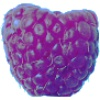

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


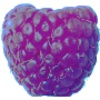

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


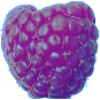

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


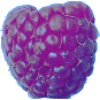

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


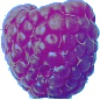

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


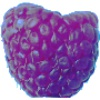

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


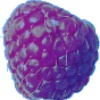

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


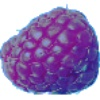

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


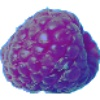

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


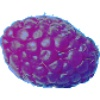

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


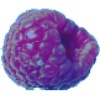

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


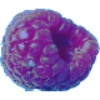

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


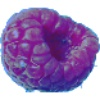

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


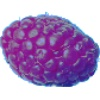

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


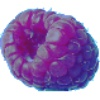

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


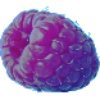

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


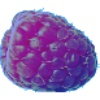

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


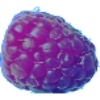

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


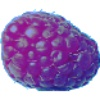

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


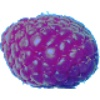

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


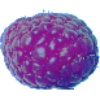

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


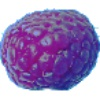

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


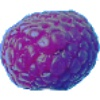

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[12]


In [24]:
path = "./duomenys/test/raspberry/"
image_dir = os.listdir(path)
for file in image_dir:
    img = image.load_img(path+file)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    img.show()
    
                   

    prob = model.predict(x)
    print(prob)
    a = np.argmax(prob, axis=1)
    print(a)

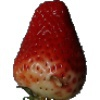

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[13]


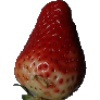

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[13]


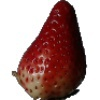

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[13]


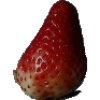

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[13]


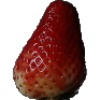

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[13]


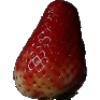

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[13]


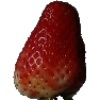

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[13]


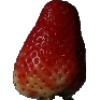

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[13]


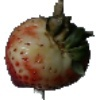

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[13]


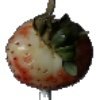

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[13]


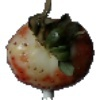

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[13]


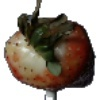

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[13]


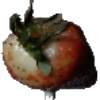

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


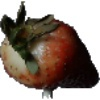

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[5]


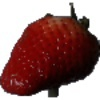

1/1 [==============================] - 0s 17ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


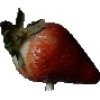

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[13]


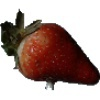

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[13]


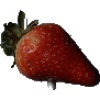

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[13]


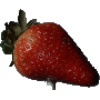

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[13]


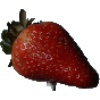

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[13]


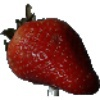

1/1 [==============================] - 0s 17ms/step
[[1.4873337e-13 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]]
[13]


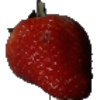

1/1 [==============================] - 0s 16ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


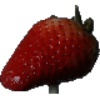

1/1 [==============================] - 0s 16ms/step
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 2.6624825e-31 0.0000000e+00]]
[0]


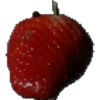

1/1 [==============================] - 0s 17ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


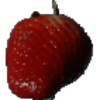

1/1 [==============================] - 0s 16ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]


In [25]:
path = "./duomenys/test/strawberry/"
image_dir = os.listdir(path)
for file in image_dir:
    img = image.load_img(path+file)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    img.show()
    
                   

    prob = model.predict(x)
    print(prob)
    a = np.argmax(prob, axis=1)
    print(a)

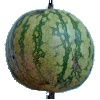

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[14]


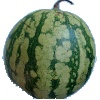

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[14]


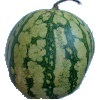

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[14]


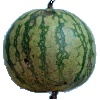

1/1 [==============================] - 0s 17ms/step
[[0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.3733212e-19]]
[2]


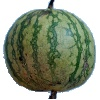

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[14]


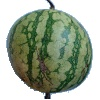

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[14]


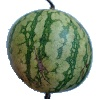

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[14]


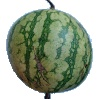

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[14]


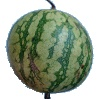

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[14]


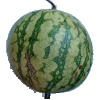

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[14]


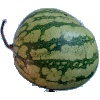

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[14]


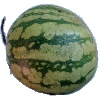

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[14]


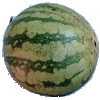

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[14]


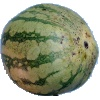

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[14]


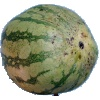

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[14]


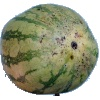

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[14]


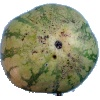

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[11]


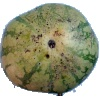

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[11]


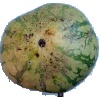

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[11]


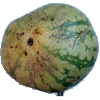

1/1 [==============================] - 0s 19ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.9234993e-19]]
[11]


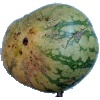

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[14]


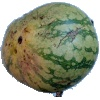

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[14]


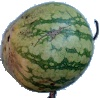

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[14]


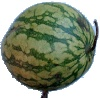

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[14]


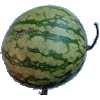

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[14]


In [26]:
path = "./duomenys/test/watermelon/"
image_dir = os.listdir(path)
for file in image_dir:
    img = image.load_img(path+file)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    img.show()
    
                   

    prob = model.predict(x)
    print(prob)
    a = np.argmax(prob, axis=1)
    print(a)

In [ ]:
t